# 学历与地区、性别的交叉可视化分析————基于国家统计局2022年《分地区按性别、6岁以上受教育人口》的调查数据

## 一、数据来源

    该数据集来源于国家统计局《分地区按性别、6岁以上受教育人口》

## 二、分析内容

    本项目主要探究以下两个问题：
（1）四川省不同学历层次人口分布的特征，以及这些分布与全国平均水平的差异。
（2）研究不同学历层次中男女人口比例，探讨教育机会的性别差异。

## 三、数据读取与清理

### （一）数据读取

In [1]:
import pandas as pd

In [2]:
education_data = pd.read_excel(r"C:\Users\52699\Desktop\数据集\教育数据相关\（原始数据）分地区按性别、6岁以上受教育人口.xlsx",header = [0,1])

In [3]:
education_data.head()

Unnamed: 0_level_0  6岁及以上人口                        未上过学                     \
                  地区       合计 合计.1       男       女     小计 小计.1      男      女   
0                 全国  1363035  NaN  695142  667894  51393  NaN  14948  36444   
1                 北京    21297  NaN   10868   10429    282  NaN     89    194   
2                 天津    13355  NaN    6841    6514    239  NaN     72    167   
3                 河北    71816  NaN   35581   36235   2021  NaN    683   1338   
4                 山西    33750  NaN   17224   16526    669  NaN    252    417   

       小学  ...   大学专科           大学本科                       研究生             \
       小计  ...      男      女      小计 小计.1      男      女     小计 小计.1     男   
0  355354  ...  70295  63655  118553  NaN  60673  57881  12912  NaN  6724   
1    2309  ...   1711   1592    5498  NaN   2792   2706   1918  NaN  1048   
2    2143  ...    958    828    2316  NaN   1172   1144    282  NaN   151   
3   17913  ...   2841   3046    5192  NaN   2419   2773    467  NaN   233   
4    6689  ...   1832   1758    3126  NaN   1621   1505    212  NaN    88   

         
      女  
0  6187  
1   870  
2   131  
3   233  
4   125  

[5 rows x 30 columns]

In [4]:
education_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Unnamed: 0_level_0, 地区)  32 non-null     object 
 1   (6岁及以上人口, 合计)             32 non-null     int64  
 2   (6岁及以上人口, 合计.1)           0 non-null      float64
 3   (6岁及以上人口, 男)              32 non-null     int64  
 4   (6岁及以上人口, 女)              32 non-null     int64  
 5   (未上过学, 小计)                32 non-null     int64  
 6   (未上过学, 小计.1)              0 non-null      float64
 7   (未上过学, 男)                 32 non-null     int64  
 8   (未上过学, 女)                 32 non-null     int64  
 9   (小学, 小计)                  32 non-null     int64  
 10  (小学, 男)                   32 non-null     int64  
 11  (小学, 女)                   32 non-null     int64  
 12  (初中, 小计)                  32 non-null     int64  
 13  (初中, 男)                   32 non-null     int64  
 14  (初中, 女)     

### (二）数据清理

In [5]:
#删除Nan值无效数据
education_data = education_data.dropna(axis=1, how='any') 

In [6]:
# 展平多级列
education_data.columns = ['_'.join(col).strip() for col in education_data.columns.values]

In [7]:
education_data.head()

,Unnamed: 0_level_0_地区,6岁及以上人口_合计,6岁及以上人口_男,6岁及以上人口_女,未上过学_小计,未上过学_男,未上过学_女,小学_小计,小学_男,小学_女,...,高中_女,大学专科_小计,大学专科_男,大学专科_女,大学本科_小计,大学本科_男,大学本科_女,研究生_小计,研究生_男,研究生_女
0,全国,1363035,695142,667894,51393,14948,36444,355354,167013,188341,...,99455,133949,70295,63655,118553,60673,57881,12912,6724,6187
1,北京,21297,10868,10429,282,89,194,2309,1085,1224,...,1765,3303,1711,1592,5498,2792,2706,1918,1048,870
2,天津,13355,6841,6514,239,72,167,2143,1013,1131,...,1143,1785,958,828,2316,1172,1144,282,151,131
3,河北,71816,35581,36235,2021,683,1338,17913,8307,9606,...,5688,5888,2841,3046,5192,2419,2773,467,233,233
4,山西,33750,17224,16526,669,252,417,6689,3027,3662,...,2750,3590,1832,1758,3126,1621,1505,212,88,125


In [8]:
# 将宽格式数据转换为长格式
education_data = pd.melt(education_data, id_vars=['Unnamed: 0_level_0_地区'], var_name='学历_性别', value_name='人数')

In [9]:
# 将 '学历_性别' 列拆分为 '学历' 和 '性别' 两列
education_data[['学历', '性别']] = education_data['学历_性别'].str.split('_', expand=True)

In [10]:
# 删除不必要的 '学历_性别' 列
education_data = education_data.drop(columns=['学历_性别'])

In [11]:
# 重命名列
education_data = education_data.rename(columns={'Unnamed: 0_level_0_地区': '地区'})

In [12]:
education_data.head()

,地区,人数,学历,性别
0,全国,1363035,6岁及以上人口,合计
1,北京,21297,6岁及以上人口,合计
2,天津,13355,6岁及以上人口,合计
3,河北,71816,6岁及以上人口,合计
4,山西,33750,6岁及以上人口,合计


In [13]:
# 删除若干与分析内容无关且影响表格结构的数据
education_data = education_data.drop(education_data[education_data['性别'] =='小计'].index)
education_data = education_data.drop(education_data[education_data['性别'] =='合计'].index)
education_data = education_data.drop(education_data[education_data['地区'] =='全国'].index)
education_data = education_data.drop(education_data[education_data['学历'] =='6岁及以上人口'].index)

In [14]:
# 合并若干值以精简表格结构
education_data['学历'] = education_data['学历'].replace({'初中': '中学', '高中': '中学','大学专科': '专科', '大学本科': '本科'})

In [15]:
education_data

,地区,人数,学历,性别
129,北京,89,未上过学,男
130,天津,72,未上过学,男
131,河北,683,未上过学,男
132,山西,252,未上过学,男
133,内蒙古,273,未上过学,男
...,...,...,...,...
763,陕西,205,研究生,女
764,甘肃,130,研究生,女
765,青海,31,研究生,女
766,宁夏,17,研究生,女


In [16]:
education_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 129 to 767
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   地区      434 non-null    object
 1   人数      434 non-null    int64 
 2   学历      434 non-null    object
 3   性别      434 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.0+ KB


## 四、数据可视化分析

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'SimSun'

### （一）四川省不同学历层次人口分布的特征

#### 1.四川省内不同学历层次人口分布

In [18]:
grouped = education_data.groupby(['地区','学历'])['人数'].sum().reset_index()

In [19]:
grouped

,地区,学历,人数
0,上海,专科,3246
1,上海,中学,11325
2,上海,小学,3072
3,上海,未上过学,501
4,上海,本科,4997
...,...,...,...
181,黑龙江,中学,17636
182,黑龙江,小学,6973
183,黑龙江,未上过学,924
184,黑龙江,本科,2559


Text(0.5, 1.0, '四川省不同学历人口分布情况')

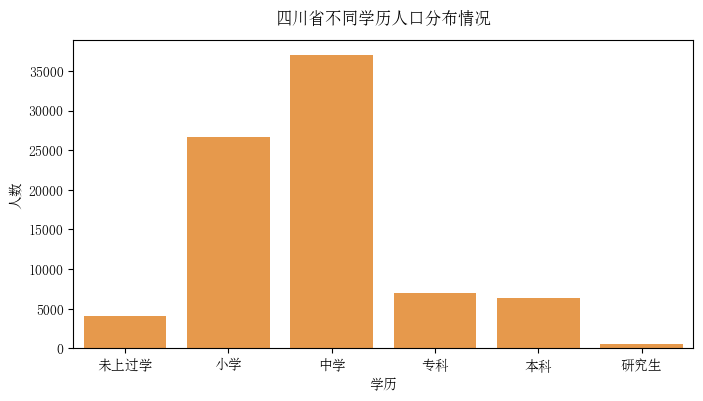

In [20]:
# 绘制四川省内不同学历人口分布情况
plt.figure(figsize = (8,4),dpi = 100)
degree_order = ['未上过学','小学','中学','专科','本科','研究生']
sichuan_fig = sns.barplot(data = grouped[grouped['地区'] =='四川'], x = '学历', y = '人数',color = '#FF9933',order = degree_order)
sichuan_fig.set_title('四川省不同学历人口分布情况',pad = 12)

#### 2. 四川省学历分布与全国平均水平对比

In [21]:
# 获取绘图所需数据
whole_average = grouped.groupby('学历')['人数'].mean()
sichuan_data = grouped[grouped['地区'] == '四川'].copy()

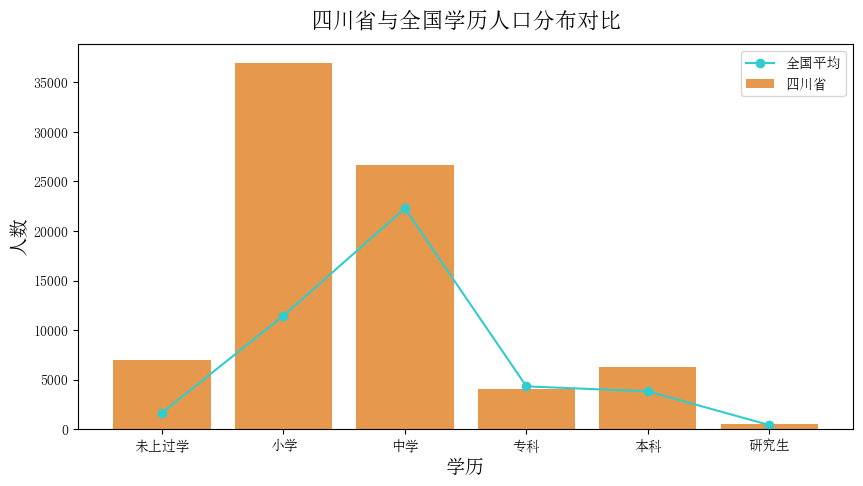

In [38]:
# 绘制四川省学历分布与全国平均水平对比图
plt.figure(figsize = (10,5))
# 四川省的学历分布
degree_order = ['未上过学','小学','中学','专科','本科','研究生']
degree_sichuan = sns.barplot(data = sichuan_data, x = '学历', y = '人数', label = '四川省',color = '#FF9933')
# 添加全国平均线
whole_average = whole_average.reindex(degree_order)
whole_average.plot(kind='line', marker='o', ax=degree_sichuan, label='全国平均',color = '#33CCCC')
# 设置图表标题和标签字体大小
plt.title('四川省与全国学历人口分布对比', fontsize=16,pad = 12)
plt.xlabel('学历', fontsize=14)
plt.ylabel('人数', fontsize=14)
# 设置图例
plt.legend()
# 显示图表
plt.show()

    由上图可知，四川省未上过学、小学学历、中学学历和本科学历的人口都高于全国平均水平，专科和研究生学历层次的人口与全国平均水平相当。

### （二）全国不同学历层次人口分布的性别差异

In [27]:
grouped2 = education_data.groupby(['学历','性别'])['人数'].sum().reset_index()

In [28]:
grouped2

,学历,性别,人数
0,专科,女,63655
1,专科,男,70294
2,中学,女,315358
3,中学,男,375485
4,小学,女,188341
5,小学,男,167013
6,未上过学,女,36446
7,未上过学,男,14951
8,本科,女,57883
9,本科,男,60676


Text(0.5, 1.0, '全国不同学历层次人口数量性别差异')

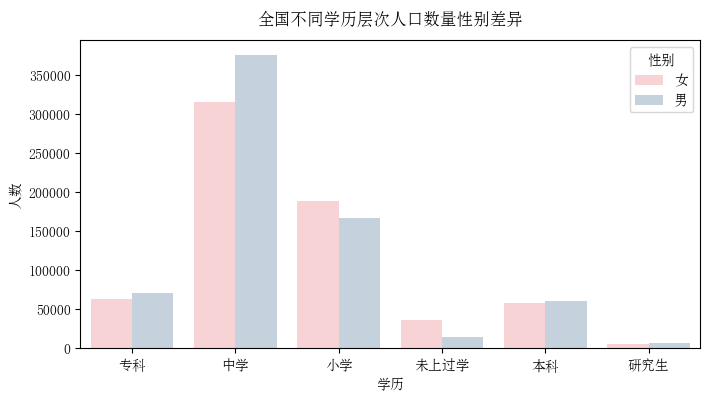

In [41]:
# 绘制不同学历层次的人数分布性别差异
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(data = grouped2, x = '学历', y = '人数', hue = '性别',palette = {'女':'#fdcdd0','男':'#c1d1e1'})
plt.title('全国不同学历层次人口数量性别差异',pad = 12)

    由上图可知，学历仅为“未上过学”和“小学”的人口中，女性多于男性。学历为“中学”和“专科”的人口中，女性少于男性。而学历为“本科”和“研究生”的人口中，女性基本与男性持平，但是整体上数量仍然略低于男性